<a href="https://colab.research.google.com/github/mohan-kv/mohan-kv/blob/main/Detecting_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecting outliers**

**1.Univariate Outlier:**    
**Z-score**
Identifies outliers by measuring how far data points are from the mean in standard deviations.

In [46]:
import pandas as pd
import numpy as np

dat1=pd.DataFrame({
    'mkv': [11,13,900,23,26,28]
})
zrs=(dat1-dat1.mean())/dat1.std()
print("Z-scores:\n",zrs)
dfno=dat1[(np.abs(zrs) < 2).all(axis=1)]

print("\nDataFrame after removing outliers with threshold of 2:")
print(dfno)


Z-scores:
         mkv
0 -0.433782
1 -0.428215
2  2.040864
3 -0.400379
4 -0.392028
5 -0.386460

DataFrame after removing outliers with threshold of 2:
   mkv
0   11
1   13
3   23
4   26
5   28


**1.Univariate outlier:**
 **IQR**


 Flags outliers based on the Interquartile Range (IQR).

In [29]:
import pandas as pd

data = pd.DataFrame({
    'A': [12,14,16,19,7000],
    'B': [21,26,23,29,3000]
})
Q1=data['A'].quantile(0.25)
Q3=data['A'].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5 * IQR
ub= Q3+ 1.5 * IQR
out=data[(data['A'] < lb) | (data['A'] > ub)]['A']

print(f"Lower bound for column A: {lb}")
print(f"Upper bound for column A: {ub}")
print("Outliers in column A:")
print(out)


Lower bound for column A: 6.5
Upper bound for column A: 26.5
Outliers in column A:
4    7000
Name: A, dtype: int64


**2.Bivariate outlier detection**
Finds outliers using two variables' joint distribution.

In [78]:
import pandas as pd
import numpy as np

data=pd.DataFrame({'A': [12, 14, 16, 19, 7000],'B': [21, 26, 23, 29, 3000]})

covm=np.cov(data.T, bias=True)
invom=np.linalg.inv(covm)
mev=data.mean().values
dif=data.values-mev

mdist=np.sum(np.dot(dif,invom) * dif,axis=1)
threshold=np.percentile(mdist, 95)
data['mahal']=mdist
outlm=data[data['mahal'] > threshold]
print(f"Empirical Mahalanobis distance threshold: {threshold}")
print("\nOutliers based on Mahalanobis distance:")
print(outlm[['A', 'B', 'mahal']])


Empirical Mahalanobis distance threshold: 3.600065580987822

Outliers based on Mahalanobis distance:
      A     B     mahal
4  7000  3000  3.999998


**3.Time series outlier detection**

Trend Analysis: Identifies long-term patterns or movements in data over time by smoothing out short-term fluctuations, often using methods like moving averages.

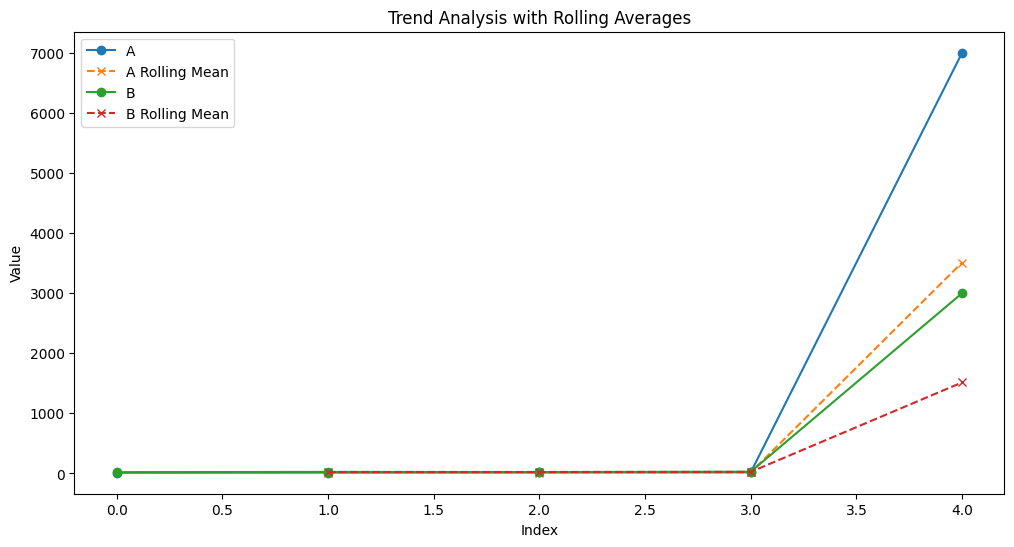

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.DataFrame({'A': [12, 14, 16, 19, 7000], 'B': [21, 26, 23, 29, 3000]})

windsize=2
data['A_rolling_mean']=data['A'].rolling(window=windsize).mean()
data['B_rolling_mean']=data['B'].rolling(window=windsize).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['A'],label='A',marker='o')
plt.plot(data['A_rolling_mean'],label='A Rolling Mean',linestyle='--',marker='x')
plt.plot(data['B'],label='B',marker='o')
plt.plot(data['B_rolling_mean'],label='B Rolling Mean',linestyle='--',marker='x')
plt.title('Trend Analysis with Rolling Averages')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


Autocorrelation: Measures the correlation of a time series with its own past values (lags) to identify repeating patterns or dependencies over time.

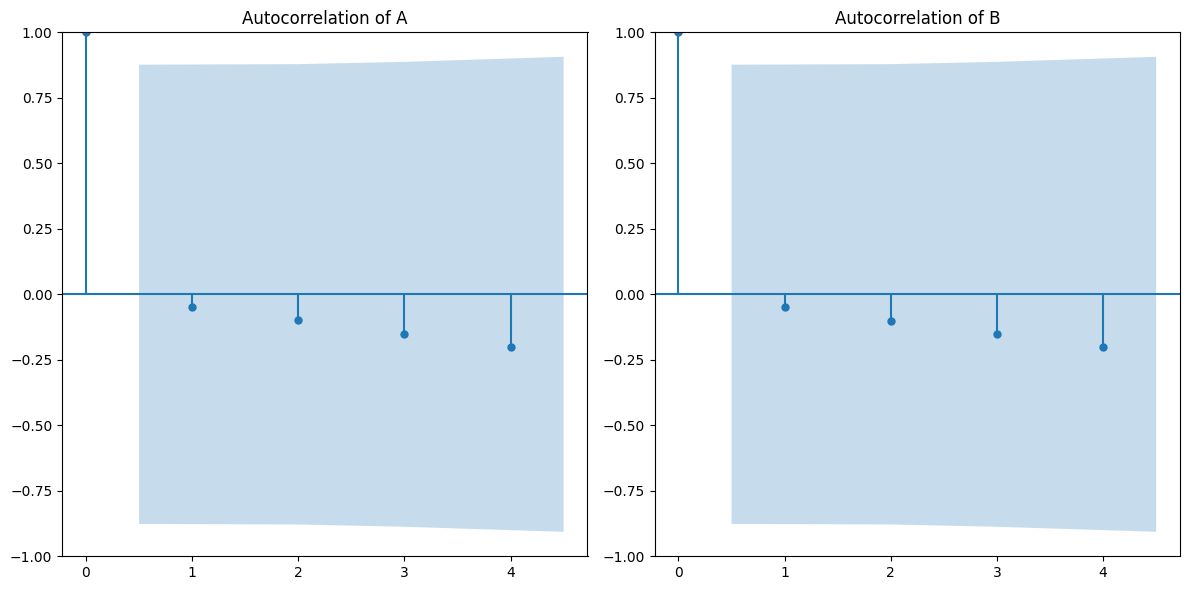

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

data=pd.DataFrame({'A': [12, 14, 16, 19, 7000], 'B': [21, 26, 23, 29, 3000]})

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data['A'],lags=4,ax=plt.gca())
plt.title('Autocorrelation of A')

plt.subplot(1, 2, 2)
plot_acf(data['B'], lags=4, ax=plt.gca())
plt.title('Autocorrelation of B')
plt.tight_layout()
plt.show()
